In [1]:
import open3d as o3d
import cv2

In [2]:
c_file = '/media/commaai-03/Data/workdata/D435_data/1579511422.783361173.png'
d_file = '/media/commaai-03/Data/workdata/D435_data/1579511422.783361173_.png'

In [3]:
c = o3d.io.read_image(c_file)
d = o3d.io.read_image(d_file)

In [4]:
rgbdImage = o3d.geometry.RGBDImage()
rgbdImage = rgbdImage.create_from_color_and_depth(c, d, convert_rgb_to_intensity=False)

In [5]:
rgbdImage

RGBDImage of size 
Color image : 1280x720, with 3 channels.
Depth image : 1280x720, with 1 channels.
Use numpy.asarray to access buffer data.

<function matplotlib.pyplot.show(*args, **kw)>

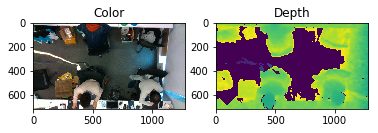

In [7]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title('Color')
plt.imshow(rgbdImage.color)
plt.subplot(1, 2, 2)
plt.title('Depth')
plt.imshow(rgbdImage.depth)
plt.show

In [8]:
cam_intrinsic = o3d.camera.PinholeCameraIntrinsic(width=1280,
                                                  height=720,
                                                  fx=922.38818359375,
                                                  fy=922.6083374023438,
                                                  cx=635.1220703125,
                                                  cy=371.8973693847656)

In [9]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
      rgbdImage,
      cam_intrinsic)

In [10]:
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

geometry::PointCloud with 577448 points.

In [17]:
vis = o3d.visualization.Visualizer()
vis.create_window(window_name="Open3D",
                  width=1280,
                  height=720)
view_control = vis.get_control

In [ ]:
o3d.visualization.draw_geometries([pcd])